# DBSCAN
**Density-based spatial clustering of applications with noise (DBSCAN)** is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. ... 

**Introduction**

Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

**Why do we need a Density-Based clustering algorithm like DBSCAN when we already have K-means clustering?**

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.


Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.


What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. Below figure illustrates the fact:

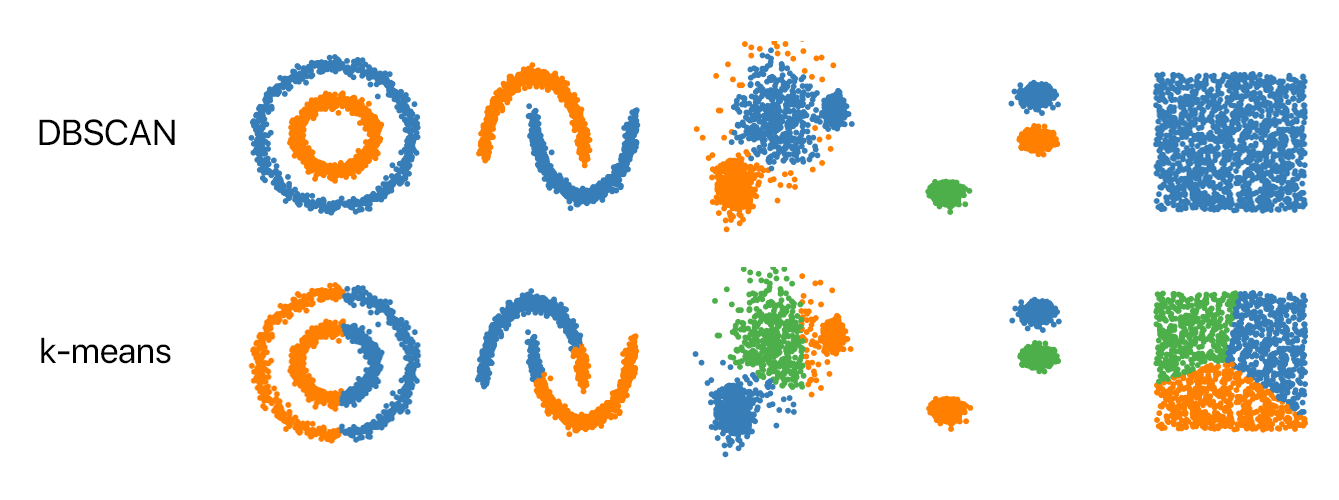

**Density-Based Clustering Algorithms**

Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two parameters:

1. **minPts**: The minimum number of points (a threshold) clustered together for a region to be considered dense.

2. **eps (ε)**: A distance measure that will be used to locate the points in the neighborhood of any point.
These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. 

For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

There are three types of points after the DBSCAN clustering is complete:

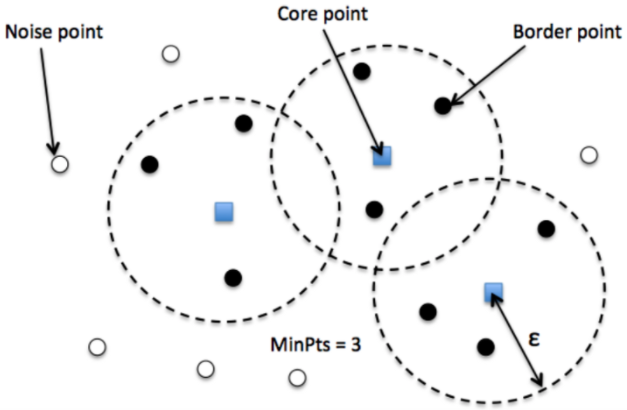

1. Core — This is a point that has at least m points within distance n from itself.
2. Border — This is a point that has at least one Core point at a distance n.
3. Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

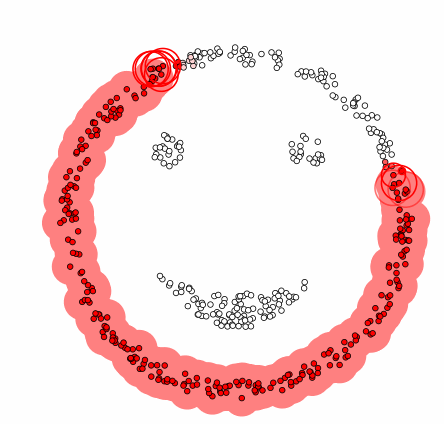

**Parameter Estimation**

Every data mining task has the problem of parameters. Every parameter influences the algorithm in specific ways. For DBSCAN, the parameters ε and minPts are needed.

1. **minPts**: As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as minPts ≥ D + 1. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, minPts = 2·dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

2. **ε:** The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.


3. **Distance function:** The choice of distance function is tightly linked to the choice of ε, and has a major impact on the outcomes. In general, it will be necessary to first identify a reasonable measure of similarity for the data set, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set.

In [1]:
import pandas as pd
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
df.horsepower.replace(to_replace='?',value=93.5,inplace=True)

C:\Users\piyus\AppData\Local\Temp\ipykernel_12300\3365685717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.horsepower.replace(to_replace='?',value=93.5,inplace=True)


In [7]:
df.horsepower = df.horsepower.astype('float')

In [9]:
df.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [11]:
df1 = df[['mpg','horsepower']].values
df1

array([[ 18. , 130. ],
       [ 15. , 165. ],
       [ 18. , 150. ],
       [ 16. , 150. ],
       [ 17. , 140. ],
       [ 15. , 198. ],
       [ 14. , 220. ],
       [ 14. , 215. ],
       [ 14. , 225. ],
       [ 15. , 190. ],
       [ 15. , 170. ],
       [ 14. , 160. ],
       [ 15. , 150. ],
       [ 14. , 225. ],
       [ 24. ,  95. ],
       [ 22. ,  95. ],
       [ 18. ,  97. ],
       [ 21. ,  85. ],
       [ 27. ,  88. ],
       [ 26. ,  46. ],
       [ 25. ,  87. ],
       [ 24. ,  90. ],
       [ 25. ,  95. ],
       [ 26. , 113. ],
       [ 21. ,  90. ],
       [ 10. , 215. ],
       [ 10. , 200. ],
       [ 11. , 210. ],
       [  9. , 193. ],
       [ 27. ,  88. ],
       [ 28. ,  90. ],
       [ 25. ,  95. ],
       [ 25. ,  93.5],
       [ 19. , 100. ],
       [ 16. , 105. ],
       [ 17. , 100. ],
       [ 19. ,  88. ],
       [ 18. , 100. ],
       [ 14. , 165. ],
       [ 14. , 175. ],
       [ 14. , 153. ],
       [ 14. , 150. ],
       [ 12. , 180. ],
       [ 13

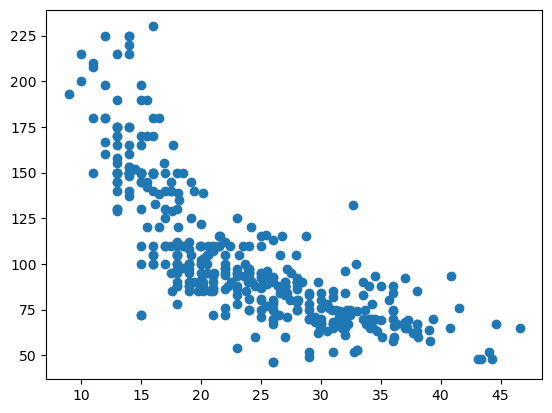

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df1[:,0],df1[:,1])
plt.show()

## Build a DBSCAN model

***Building the DBSCAN model with epsilon as 0.6 and min_samples as 5***

In [15]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.6,min_samples=5)

In [17]:
# Train the DBSCAN model
model.fit(df1)

DBSCAN(eps=0.6)

In [19]:
labels = model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [21]:
import numpy as np
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [23]:
len(np.unique(labels))

3

<Axes: ylabel='count'>

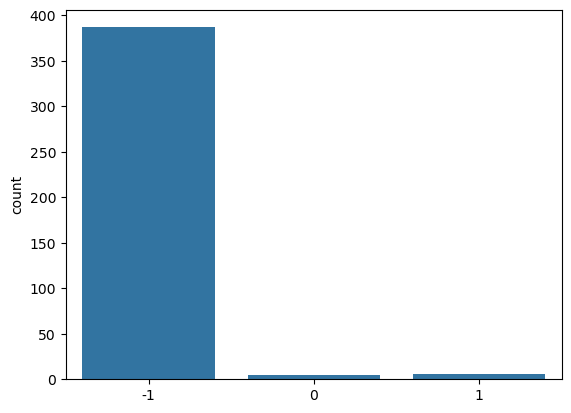

In [25]:
import seaborn as sns
sns.countplot(x = labels)

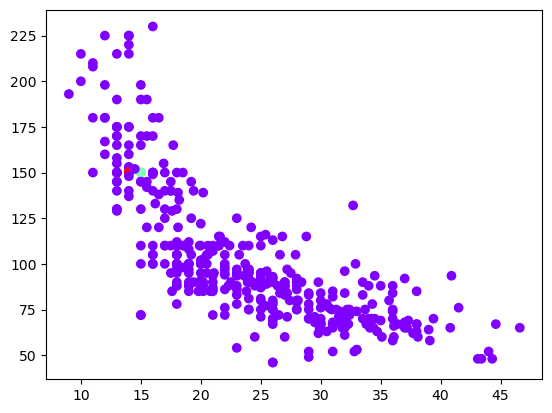

In [27]:
plt.scatter(df1[:,0],df1[:,1],c=labels,cmap='rainbow')